# **Sales Prediction Using Python**

Predicting sales is a crucial task for businesses to optimize their advertising strategies. This project focuses on building a machine learning model to predict sales based on advertising spending across different channels such as TV, Radio, and Newspaper.

The dataset contains data on advertising budgets for three media platforms: TV, Radio, and Newspaper, along with the corresponding sales figures.

I will follow this workflow in this project:

1.   **Load and Explore the Dataset:** Load the dataset, explore its structure,
      and check for missing or inconsistent data.
2.   **Preprocess the Data:** Handle missing values (if any), scale numerical
     features, and split the dataset into training and testing sets.
3.   **Perform Exploratory Data Analysis (EDA):** Visualize the relationships
     between advertising channels and sales, and analyze feature correlations.
4.   **Train Multiple Regression Models:** Train models like Linear Regression,
     Decision Tree, Random Forest, and Gradient Boosting. Evaluate their performance using metrics such as R², Mean Absolute Error (MAE), and Root Mean Squared Error (RMSE).
5.   **Select the Best Model:** Choose the model with the best performance and
      save it for future use.
6.   **Predict Sales for New Data:** Demonstrate predictions on unseen data  
       using the final model.

**Load and Explore the Dataset**

In [ ]:
# Step 1: Load and Explore the Dataset

# Importing necessary libraries
import pandas as pd

# Load the dataset
df = pd.read_csv('Advertising.csv')

# Display the shape of the dataset
print("Dataset Shape:", df.shape)

# Display the first few rows of the dataset
print("\nDataset Preview:")
print(df.head())

# Get information about the dataset
print("\nDataset Info:")
print(df.info())

# Get summary statistics for the numerical features
print("\nSummary Statistics:")
print(df.describe())

# Check for missing values in the dataset
print("\nMissing Values:")
print(df.isnull().sum())


Dataset Shape: (200, 5)

Dataset Preview:
   Unnamed: 0     TV  Radio  Newspaper  Sales
0           1  230.1   37.8       69.2   22.1
1           2   44.5   39.3       45.1   10.4
2           3   17.2   45.9       69.3    9.3
3           4  151.5   41.3       58.5   18.5
4           5  180.8   10.8       58.4   12.9

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB
None

Summary Statistics:
       Unnamed: 0          TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000  200.000000
mean   100.500000  147.042500   23.264000   30.554000   14.022500
st

**Preprocess the Data**

In this step, unnecessary columns like `Unnamed: 0` are removed as they do not contribute to the analysis. Interaction terms (`TV_Radio`, `TV_Newspaper`, `Radio_Newspaper`) are added to capture relationships between features, enabling the model to understand combined effects of advertising mediums. Outliers are identified and removed using the Interquartile Range (IQR) method to ensure the data is clean and free of extreme values that could distort model predictions. This preprocessing prepares the dataset for accurate and effective model training.

In [ ]:
# Step 2: Preprocess the Data

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Drop the unnecessary column (Unnamed: 0)
df = df.drop(columns=['Unnamed: 0'])

# Feature Engineering: Add interaction terms
df['TV_Radio'] = df['TV'] * df['Radio']  # Interaction between TV and Radio
df['TV_Newspaper'] = df['TV'] * df['Newspaper']  # Interaction between TV and Newspaper
df['Radio_Newspaper'] = df['Radio'] * df['Newspaper']  # Interaction between Radio and Newspaper

# Outlier Detection and Removal
# Using IQR (Interquartile Range) to detect and remove outliers
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]


**Exploratory Data Analysis (EDA)**

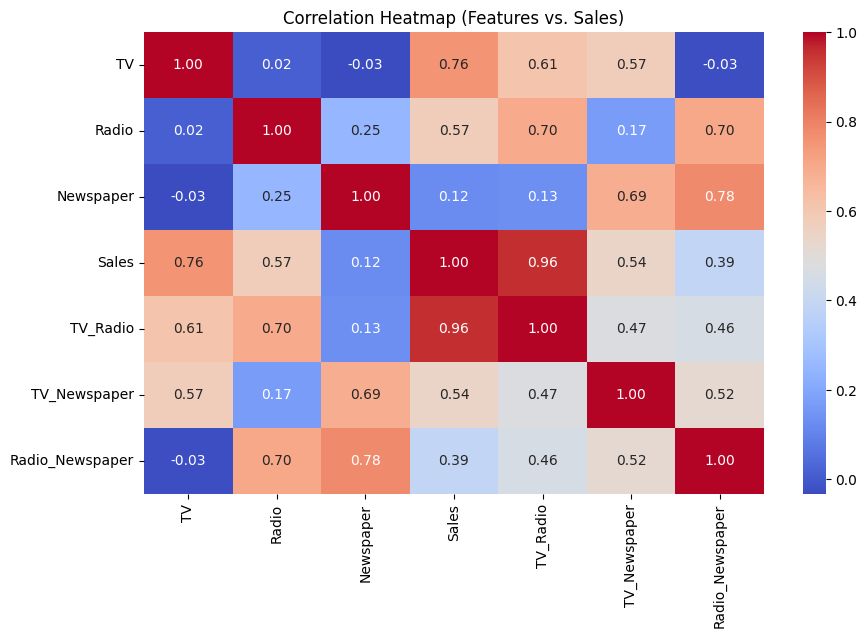

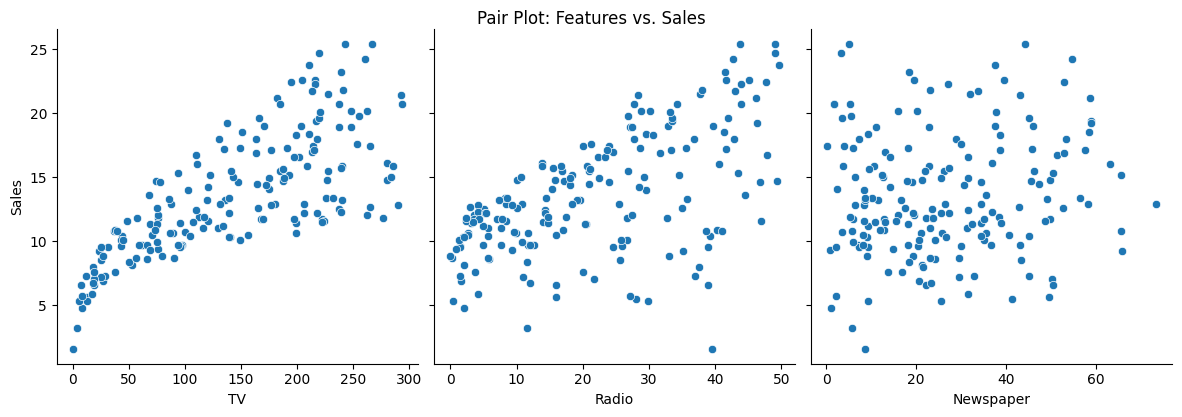

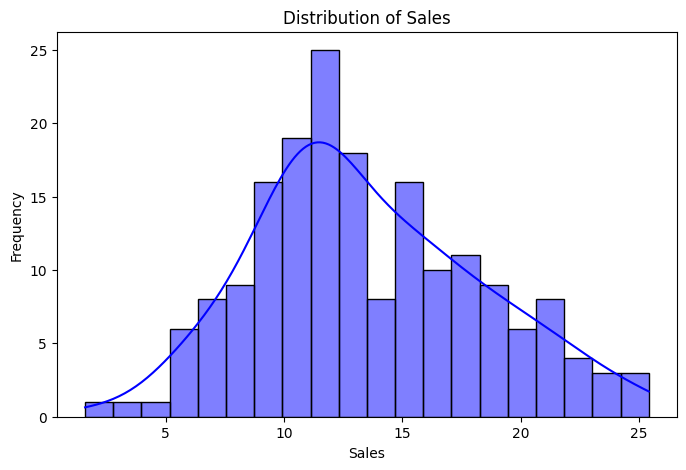

In [ ]:
# Step 3: Perform Exploratory Data Analysis (EDA)

import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap (Features vs. Sales)")
plt.show()

# Step 2: Pair Plot for Relationships
sns.pairplot(df, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales', height=4, aspect=1, kind='scatter')
plt.suptitle("Pair Plot: Features vs. Sales", y=1.02)
plt.show()

# Step 3: Distribution of Sales
plt.figure(figsize=(8, 5))
sns.histplot(df['Sales'], kde=True, bins=20, color='blue')
plt.title("Distribution of Sales")
plt.xlabel("Sales")
plt.ylabel("Frequency")
plt.show()


In this step, features with weak correlation to `Sales`, such as `Newspaper` and its interaction terms (`TV_Newspaper`, `Radio_Newspaper`), are removed to reduce noise and improve model efficiency. The remaining features are defined as the independent variable `X`, while `Sales` serves as the target variable `y`. The data is then standardized using `StandardScaler` to ensure all features have equal importance, especially since they have different scales. Finally, the dataset is split into training and testing sets, with 80% of the data allocated for training and 20% for testing. This ensures the model is trained on a majority of the data while being evaluated on unseen data for performance validation.

In [ ]:
# Feature Selection: Drop Newspaper due to weak correlation with Sales
df = df.drop(columns=['Newspaper', 'TV_Newspaper', 'Radio_Newspaper'])  # Dropping weakly correlated features and interactions

# Define features (X) and target (y)
X = df.drop(columns=['Sales'])  # Features
y = df['Sales']  # Target

# Step 4: Scale the Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print("\nShapes of Training and Testing Sets:")
print("X_train:", X_train.shape, "X_test:", X_test.shape, "y_train:", y_train.shape, "y_test:", y_test.shape)



Shapes of Training and Testing Sets:
X_train: (145, 3) X_test: (37, 3) y_train: (145,) y_test: (37,)


**Train and Evaluate Models**

In this step, I will train multiple regression models, including Linear Regression, Random Forest, and Gradient Boosting, to predict sales based on advertising data. Each model's performance will be evaluated using metrics like R² (Coefficient of Determination), MAE (Mean Absolute Error), and RMSE (Root Mean Squared Error).

In [ ]:
# Step 5: Train and Evaluate Multiple Regression Models

# Import necessary libraries for evaluation
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
}

# Train and evaluate each model
results = {}
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    # Make predictions
    y_pred = model.predict(X_test)
    # Evaluate performance
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    # Store the results
    results[name] = {"R² Score": r2, "MAE": mae, "RMSE": rmse}

# Display results
print("\nModel Evaluation Results:")
for model_name, metrics in results.items():
    print(f"{model_name} Results:")
    print(f"R² Score: {metrics['R² Score']:.2f}")
    print(f"Mean Absolute Error (MAE): {metrics['MAE']:.2f}")
    print(f"Root Mean Squared Error (RMSE): {metrics['RMSE']:.2f}\n")



Model Evaluation Results:
Linear Regression Results:
R² Score: 0.98
Mean Absolute Error (MAE): 0.57
Root Mean Squared Error (RMSE): 0.69

Random Forest Results:
R² Score: 0.99
Mean Absolute Error (MAE): 0.37
Root Mean Squared Error (RMSE): 0.47

Gradient Boosting Results:
R² Score: 0.99
Mean Absolute Error (MAE): 0.34
Root Mean Squared Error (RMSE): 0.43



**Step 6: Selecting the Best-Performing Model**

Based on the evaluation results:

*  Linear Regression performs well with an R² Score of 0.98, but its MAE and
   RMSE are slightly higher compared to other models.
*  Random Forest achieves an excellent R² Score of 0.99, with an MAE of 0.37
   and RMSE of 0.47
*  Gradient Boosting also achieves an R² Score of 0.99, with slightly better  
   MAE (0.34) and RMSE (0.43) than Random Forest.

Thus, Gradient Boosting is selected as the best-performing model based on its lower MAE and RMSE values while maintaining a high R² Score.

**Save the Final Model**

In [ ]:
import joblib

# Save the best-performing model
final_model = GradientBoostingRegressor(random_state=42)
final_model.fit(X_train, y_train)  # Train on the entire training set
joblib.dump(final_model, 'final_gradient_boosting_model.pkl')
print("Final model saved as final_gradient_boosting_model.pkl!")




Final model saved as final_gradient_boosting_model.pkl!


### **Making Predictions with the Final Model**

In this step, I demonstrate how to use the saved final model to make predictions on new, unseen data. This is crucial in real-world applications where the model is deployed to predict outcomes based on new inputs.

1. Prepare the new data, ensuring it includes only the features the model was trained on, including interaction terms.
2. Scale the new data using the same scaler used during training.
3. Load the saved model to make predictions on the prepared and scaled data.

The example below demonstrates predicting sales based on specific values of `TV` and `Radio` advertising spend.


In [ ]:
# Step 8: Making Predictions with the Final Model

import joblib
import pandas as pd
import numpy as np

# Example new data: TV=150, Radio=20
new_data = pd.DataFrame([[150, 20, 150 * 20]], columns=['TV', 'Radio', 'TV_Radio'])  # Create DataFrame with feature names
print("\nNew Data for Prediction:")
print(new_data)

# Scale the new data
new_data_scaled = scaler.transform(new_data)

# Load the saved model
loaded_model = joblib.load('final_gradient_boosting_model.pkl')

# Make predictions
predicted_sales = loaded_model.predict(new_data_scaled)
print(f"\nPredicted Sales for the new data (TV=150, Radio=20,TV_Radio=3000 ): {predicted_sales[0]:.2f}")



New Data for Prediction:
    TV  Radio  TV_Radio
0  150     20      3000

Predicted Sales for the new data (TV=150, Radio=20,TV_Radio=3000 ): 14.10


# **Sales Prediction using Machine Learning**

This project focuses on predicting sales of products based on advertising spend across TV, Radio, and Newspaper channels. The goal was to build an accurate regression model through comprehensive preprocessing, analysis, and evaluation of various algorithms.

---

## Summary of Steps

1. **Data Exploration and Preprocessing**:
   - The dataset was analyzed for structure, missing values, and outliers.
   - Interaction terms (`TV_Radio`, `TV_Newspaper`, `Radio_Newspaper`) were created to capture combined effects of features.
   - Features with weak correlation with the target (`Newspaper`) were dropped to simplify the model.
   - Numerical features were scaled using `StandardScaler` for consistency.
   - Outliers were identified and removed using the **IQR (Interquartile Range)** method.

2. **Exploratory Data Analysis (EDA)**:
   - Visualizations revealed meaningful patterns:
     - **Correlation Heatmap**: `TV` and `Radio` showed strong positive correlations with `Sales`.
     - **Pair Plots**: Highlighted linear relationships between `TV`, `Radio`, and `Sales`.
     - **Distribution Plot**: Confirmed that `Sales` is normally distributed, facilitating regression modeling.

3. **Model Training and Evaluation**:
   - Trained and evaluated multiple regression models:
     - `LinearRegression()`
     - `RandomForestRegressor()`
     - `GradientBoostingRegressor()`
   - Metrics used for evaluation:
     - **R² Score**
     - **Mean Absolute Error (MAE)**
     - **Root Mean Squared Error (RMSE)**
   - **Gradient Boosting Regressor** achieved the best results:
     - **R² Score**: `0.99`
     - **MAE**: `0.34`
     - **RMSE**: `0.43`

4. **Final Model Selection and Saving**:
   - `GradientBoostingRegressor` was chosen as the final model.
   - The model was saved as `final_gradient_boosting_model.pkl` for deployment.

5. **Prediction Example**:
   - Demonstrated the model’s ability to predict sales for a given advertising budget. For example, with `TV=150` and `Radio=20`, the predicted sales were **14.10 units**.

---

## Key Takeaways
- **TV and Radio advertising budgets** are the most significant predictors of sales.
- Gradient Boosting excels in capturing non-linear relationships, making it the top-performing model.
- Preprocessing steps like outlier removal, feature scaling, and interaction terms significantly enhance model performance.

---

## Conclusion
This project showcases how data preprocessing, exploratory analysis, and algorithm selection contribute to building robust machine learning models. By leveraging Gradient Boosting, the sales prediction model achieves high accuracy, making it a valuable tool for optimizing advertising strategies.